In [1]:
from simulate_returns import * 
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
### Growth of DeFi: https://consensys.net/blog/cryptoeconomic-research/defi-market-commentary-may-2022/
### 43% vs 29% (or less) for other crypto. We will round this to 15% faster growth.

In [3]:
### Growth rate FRAX:
### Monthly model:
T=24*365 * 1.5
FRAX_month = np.zeros(18) + .2
FRAX_month[8:13] = [0.7,1,1.2,.8,.5]
i = 0
k = 0 ### Counts days in month
FRAX_hype = np.zeros(int(T))
while i<len(FRAX_hype):
    FRAX_hype[i] = FRAX_month[int(i/(24*31))]

        
    
    i+=1
FRAX_hype

array([0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2])

In [4]:
### Trying to create the market sentiment, just as it was 2021-2022.
### So, one year (a bit more) when we grew for a year and then dropping for half a year (quite fast after 1.25 years).
def our_sent():
    ### For a year and a half:
    T=24*365
    t = 0
    N = int(T*1.5)
    mkt_sent = np.zeros(N)
    while t<N:
        mkt_sent[t] = np.sin(0.8*np.pi*(t/T)+0.7)
        t+=1
    return(mkt_sent)

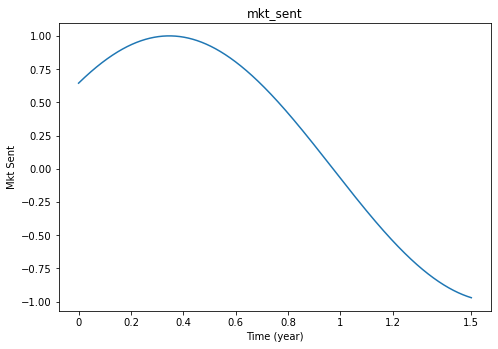

In [5]:
T=24*365
mkt_sentiment = our_sent()
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 1, 1])
x = [0,T/5, (4/10)*T,(6/10)*T,(8/10)*T,T,1.2*T,1.5*T]
ax1.plot(mkt_sentiment)
labels = [0,.2,.4,.6,.8,1,1.2,1.5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Mkt Sent")
plt.title("mkt_sent")
plt.show()

In [6]:
def network_growth(market_sentiment,staking_rate_other,starting_worth,deposit_rate,CAR,usage_growth):
    T=24*365
    N = int(T*1.5)
    dt = 1/(365*24)
    
    network_growth = np.zeros(N)
    network_growth[0] = starting_worth ### Random number
    indx_growth = 0#0.01 ### How much the index will grow on a yearly basis.
    indx_factor = 2
    CAR_ratio = 1.5
    Cmomentum = 2.2
    deposit_profit = 5
    lastmonth = np.zeros(N)
    lastmonth[0] = 0
    mkt_constant = 1.5
    #deposit_rate = np.ones(N) * 0.04
    c_usage_growth = 3.2
    
    t=1
    while t<N:
         
        if t>=(30*24+1):
            lastmonth[t] = (network_growth[t-1] - network_growth[t-30*24-1])/network_growth[t-30*24-1]
        
        network_growth[t] = network_growth[t-1] + indx_growth * indx_factor * network_growth[t-1] * dt + ((CAR - 1)/CAR) * CAR_ratio * network_growth[t-1] * dt +lastmonth[t] * Cmomentum * network_growth[t-1] * dt + market_sentiment[t]* network_growth[t-1] * mkt_constant * dt + (deposit_rate[t] + indx_growth - staking_rate_other[t] ) * deposit_profit * network_growth[t-1] * dt + usage_growth[t] * c_usage_growth * network_growth[t-1] * dt ### + volatility.
        
        
        
        t+=1
    return(network_growth)

In [7]:
### First simulating the DAI:

In [8]:
market_time,market_sentiment,b_value,r_t,default_prob,returns = sim_returns(starting_b_value = 0.03,low_bound_b = 0.03,upper_bound_b = 0.05,ltr_vol_std = 0.15, probability_of_default = 0.02, ltr_default_prob = 0.005 , starting_staking_rate = 0.03, r_t_sigma = 15, sigma_market_time = 5 , max_prob = 0.4, sigma_b = 15)
usage_growth = np.zeros(len(market_time)) + 0.15
growth = network_growth(mkt_sentiment,r_t,starting_worth = 1165741793, deposit_rate = r_t + 0.01, CAR  = 1.25,usage_growth = usage_growth)

In [9]:
growth

array([1.16574179e+09, 1.16598088e+09, 1.16622007e+09, ...,
       1.15859350e+10, 1.15849478e+10, 1.15839606e+10])

In [10]:
T = 24*365 ### Our simulated time.

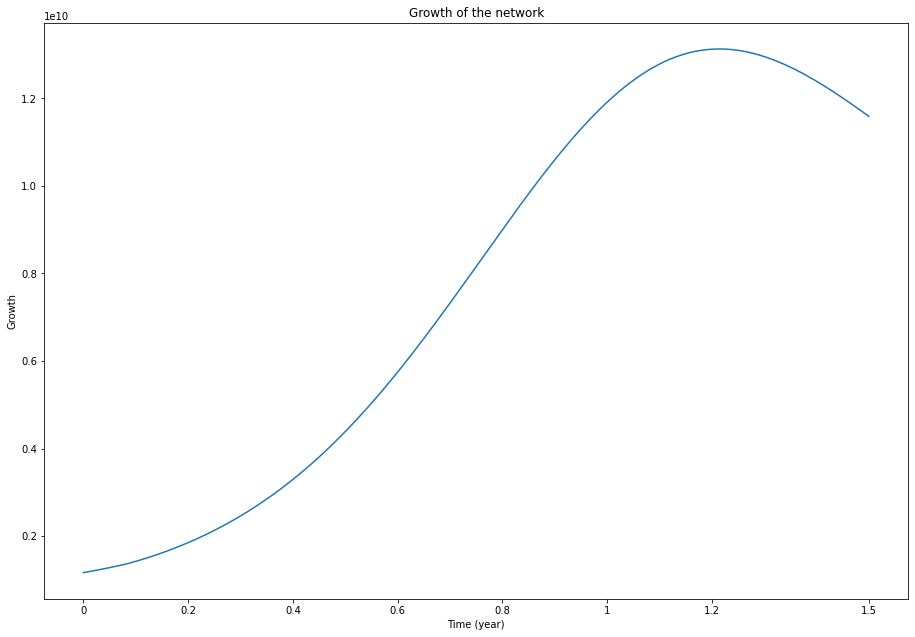

In [11]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/5, (4/10)*T,(6/10)*T,(8/10)*T,T,1.2*T,1.5*T]
ax1.plot(growth)
labels = [0,.2,.4,.6,.8,1,1.2,1.5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Growth")
plt.title("Growth of the network")
plt.show()

In [12]:
### This seems relatively similar to DAI. Perhaps a bit more convex than actual, but this is without added volatility and
### some unrealistic assumptions. 

In [13]:
### Now RAI token:
### It was roughly stable most of the time, slightly decreasing.
### their poor difference btw returns one can get with them compared to other places (staking, deposits) 
## and zero index growth. There would be a bit of what my model would consider a random volatility that hit them negatively.
## Those losses were then poorly offeset by positive market conditions, failure to get some momentum and CAR 
### ratio was neutral for them.
usage_growth = np.zeros(len(market_time))
growth = network_growth(mkt_sentiment,r_t,starting_worth = 34100665, deposit_rate = r_t * 0, CAR  = 0.98,usage_growth = usage_growth)

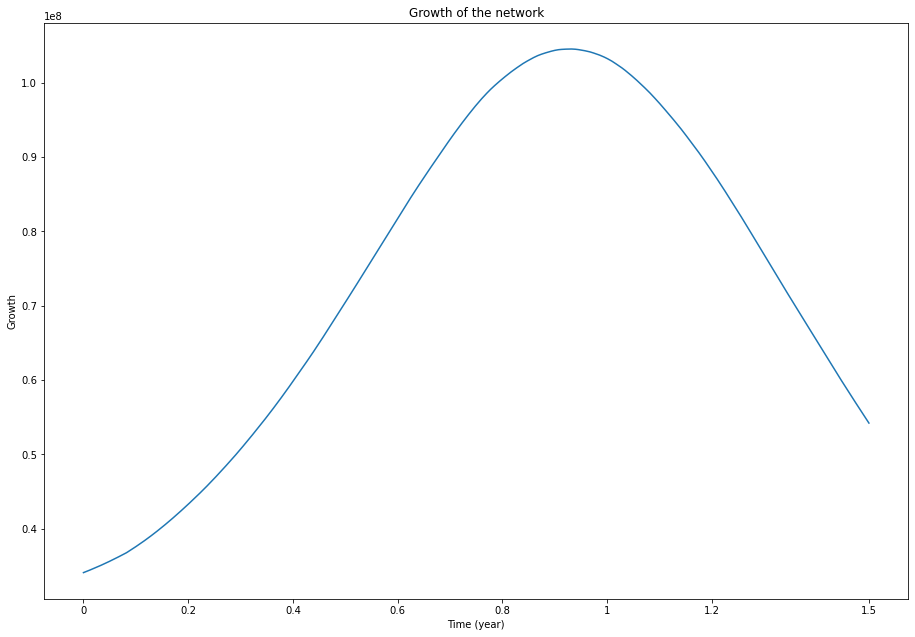

In [14]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/5, (4/10)*T,(6/10)*T,(8/10)*T,T,1.2*T,1.5*T]
ax1.plot(growth)
labels = [0,.2,.4,.6,.8,1,1.2,1.5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Growth")
plt.title("Growth of the network")
plt.show()

In [15]:
### We only have the data for RAI from cca April or June/July 2021, depending on the website (coinmarketcap.com July, Coingecko April).
### They also had significant issues before June/July by decreasing the worth of their coin and we did not model that (yet).
### So, let's take a look at the time between 0.5 and 1.5 year and see if there are any similarities.

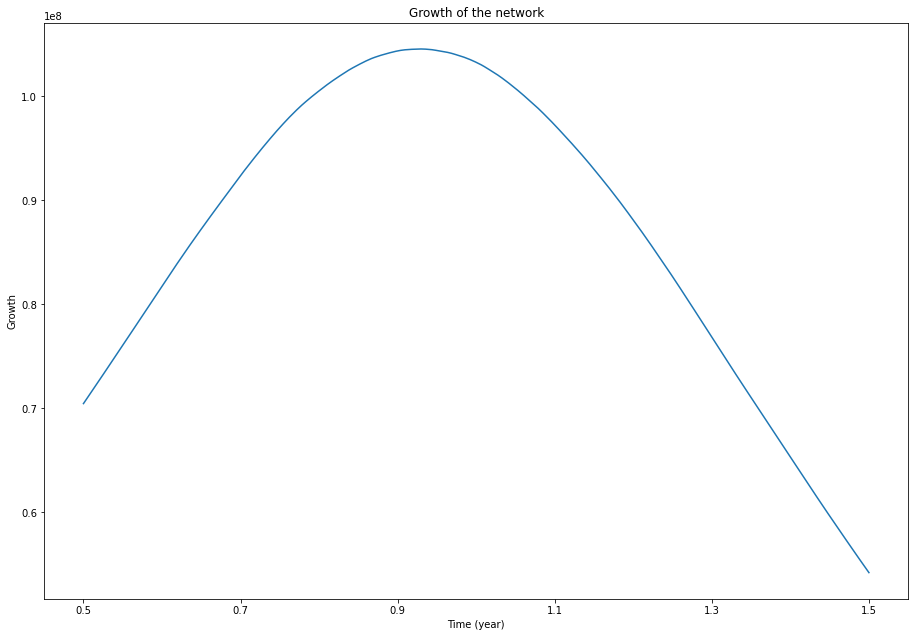

In [16]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0*T,(2/10)*T,0.4*T,0.6*T,0.8*T,T]
ax1.plot(growth[int(T/2):int(1.5*T)])
labels = [0.5,.7,.9,1.1,1.3,1.5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Growth")
plt.title("Growth of the network")
plt.show()

In [17]:
### Looks somewhat satisfactory. The thing is that in reality it grew almost 3x in that time and went to the same value.
### We grow less and get to the same value, however, this growth in real life had to do with an unexpected drop before
### that happened because external factors (loss of value of the coin). So there was an element of rebound, which we don't
### capture.

In [18]:
### FRAX: Good rate (I guess?), bad fractional reserve (0.8 CAR). It grew slowly at the beginning and only a bit later on
### it gained growth, however it also dropped substantially. Such slow initial growth is probably due to some random,
### so we will be fine with more gradual growth. Still, it grew a lot!

In [19]:
growth = network_growth(mkt_sentiment,r_t,starting_worth = 57596220, deposit_rate = r_t + 0.02, CAR  = 0.8,usage_growth = FRAX_hype)

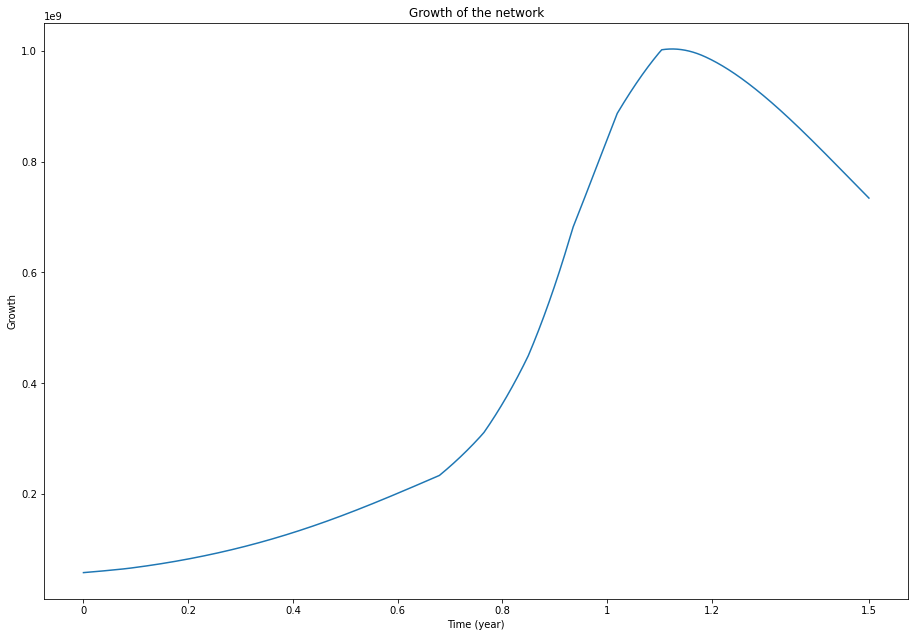

In [20]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/5, (4/10)*T,(6/10)*T,(8/10)*T,T,1.2*T,1.5*T]
ax1.plot(growth)
labels = [0,.2,.4,.6,.8,1,1.2,1.5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Growth")
plt.title("Growth of the network")
plt.show()

In [21]:
### And now for USDP:
growth_pax = network_growth(mkt_sentiment,r_t,starting_worth = 335644541, deposit_rate = r_t + 0, CAR  = 1,usage_growth = FRAX_hype*0)


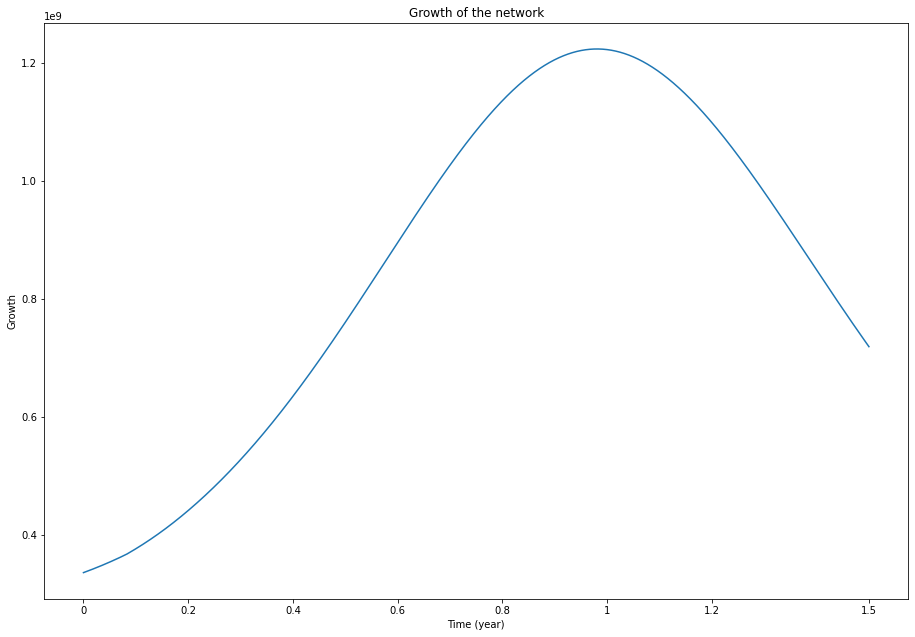

In [22]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/5, (4/10)*T,(6/10)*T,(8/10)*T,T,1.2*T,1.5*T]
ax1.plot(growth_pax)
labels = [0,.2,.4,.6,.8,1,1.2,1.5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Growth")
plt.title("Growth of the network")
plt.show()

In [23]:
### And finally, TUSD:
### And now for USDP:
growth_tusd = network_growth(mkt_sentiment,r_t,starting_worth = 281372092, deposit_rate = r_t + 0, CAR  = 1,usage_growth = FRAX_hype*0)


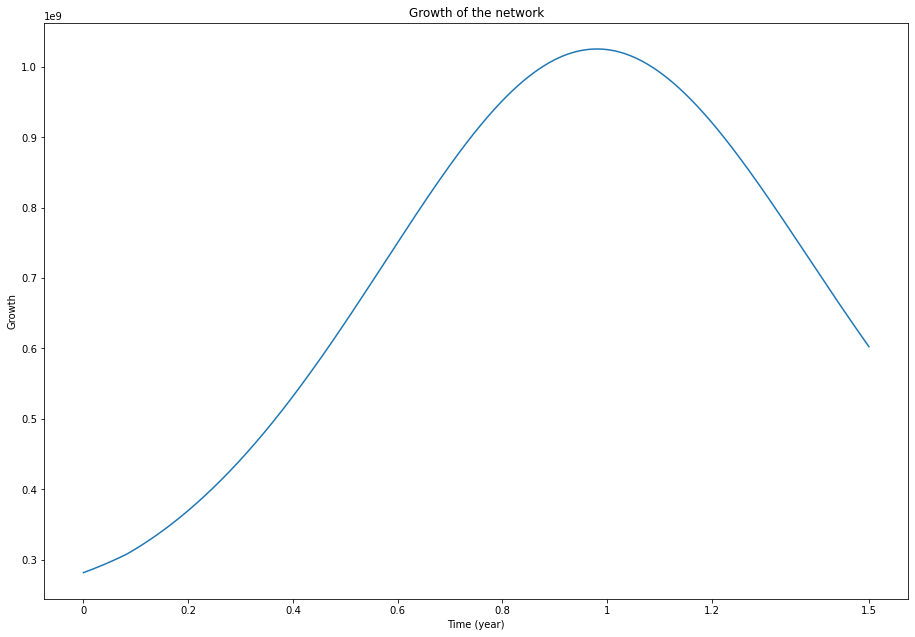

In [24]:
fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])
x = [0,T/5, (4/10)*T,(6/10)*T,(8/10)*T,T,1.2*T,1.5*T]
ax1.plot(growth_tusd)
labels = [0,.2,.4,.6,.8,1,1.2,1.5]
plt.xticks(x,labels)
plt.xlabel("Time (year)")
plt.ylabel("Growth")
plt.title("Growth of the network")
plt.show()